In this Python Notebook, you will find functions to solve numerically a system of ordinary differential equations (of first and second order).

You don't have to understand how that works, as it is intended to be used without any previous Python knowledge.

If you are running this for the first time, please click 'Run' on the top menu, then 'Run all cells'. Afterwards, you can run only the selected cells by clicking 'Run' -> 'Run selected cells' or by simply pressing 'Alt'+'Enter' with the cursor in a given cell. 

In [1]:
import numpy as np
from numpy import sin, cos, tan, log, sinh, cosh, tanh, sqrt, arcsin, arccos, arctan
from matplotlib import pyplot as plt
from scipy import integrate
plt.rcParams['figure.figsize'] = [10, 8]

In [2]:
def ode_solver(eq, x0, tf):
    sol = integrate.solve_ivp(eq, [0, tf], [x0], dense_output=True)
    t = np.linspace(0, tf, int(tf*300))
    z = sol.sol(t)
    #z[0] is x
    fig, axs = plt.subplots(1,1,figsize=(16, 8))
    axs.plot(t, z[0].T, 'g', label='x(t)')
    axs.legend(loc='best')
    axs.set_xlabel('t')
    axs.grid()
    plt.show()

In [3]:
def ode_system_solver(eq, x0, y0, tf):
    def eqs(t, x):
        return eq(t, x[0], x[1])
    sol = integrate.solve_ivp(eqs, [0, tf], [x0, y0], dense_output=True, rtol=0.00001)
    t = np.linspace(0, tf, int(tf*300))
    z = sol.sol(t)
    #z[0] is x
    #z[1] is y
    fig, axs = plt.subplots(1,1,figsize=(16, 8))
    axs.plot(t, z[0].T, 'g', label='x(t)')
    axs.plot(t, z[1].T, 'r', label='y(t)')
    axs.legend(loc='best')
    axs.set_xlabel('t')
    axs.grid()
    plt.show()
    return z

In [26]:
def eom_solver(eom, x0, vx0, tf):
    def eqs(t, x):
        return [x[1], eom(t, x[0], x[1])]
    sol = integrate.solve_ivp(eqs, [0, tf], [x0, vx0], dense_output=True)
    t = np.linspace(0, tf, int(tf*300))
    z = sol.sol(t)
    #z[0] is position
    #z[1] is velocity
    fig, axs = plt.subplots(1,2,figsize=(16, 8))
    axs[0].plot(t, z[0].T, 'g', label='x(t)')
    axs[0].plot(t, z[1].T, 'b', label='vx(t)')
    axs[0].legend(loc='best')
    axs[0].set_xlabel('t')
    axs[0].grid()
    axs[1].plot(z[0].T, z[1].T)
    axs[1].set_xlabel('x(t)')
    axs[1].set_ylabel('v(t)')
    axs[1].scatter(x0, vx0, color='r')
    axs[1].scatter(z[0].T[-1], z[1].T[-1], color='black')
    axs[1].grid()
    plt.show()

In [31]:
def eom_solver_2d(eom, x0, vx0, y0, vy0, tf):
    def eqs(t, y):
        accel = eom(t, y[0], y[1], y[2], y[3])
        return [y[1], accel[0], y[3], accel[1]]
    sol = integrate.solve_ivp(eqs, [0, tf], [x0, vx0, y0, vy0], dense_output=True, rtol=0.000001)
    t = np.linspace(0, tf, int(tf*100))
    z = sol.sol(t)
    #z[0] is position
    #z[1] is velocity
    fig, axs = plt.subplots(2,2,figsize=(16, 10))
    axs[0][0].plot(t, z[0].T, 'g', label='x(t)')
    axs[0][0].plot(t, z[2].T, 'b', label='y(t)')
    axs[0][0].set_xlabel('t')
    axs[0][0].legend(loc='best')
    axs[0][0].grid()
    axs[0][1].plot(z[0].T, z[2].T)
    axs[0][1].set_xlabel('x(t)')
    axs[0][1].set_ylabel('y(t)')
    axs[0][1].scatter(x0, y0, color='r')
    axs[0][1].scatter(z[0].T[-1], z[2].T[-1], color='black')
    axs[0][1].grid()
    axs[1][0].plot(t, z[1].T, 'g', label='vx(t)')
    axs[1][0].plot(t, z[3].T, 'b', label='vy(t)')
    axs[1][0].legend(loc='best')
    axs[1][0].set_xlabel('t')
    axs[1][0].grid()
    axs[1][1].plot(z[1].T, z[3].T)
    axs[1][1].set_xlabel('vx(t)')
    axs[1][1].set_ylabel('vy(t)')
    axs[1][1].scatter(vx0, vy0, color='r')
    axs[1][1].scatter(z[1].T[-1], z[3].T[-1], color='black')
    axs[1][1].grid()
    plt.show()

As our first example, let us solve the first order ODE given by

$x(t)' \equiv \dfrac{\text{d}x(t)}{\text{d}t} = \dfrac{1}{1+t}$

with initial condition $x(0) = 1.0$.

In order to do this, we simply define a function and give it a name (here, the name is 'simple_ode'), which gives us the right hand side of the equation.

Then we call 'ode_solver' with the function name, the initial condition, and how long we want the integration to go.

Then the code will run and we will see the plot of the solution. You are encouraged to change the equation and the initial condition, and maybe check with the solutions you can find analytically.

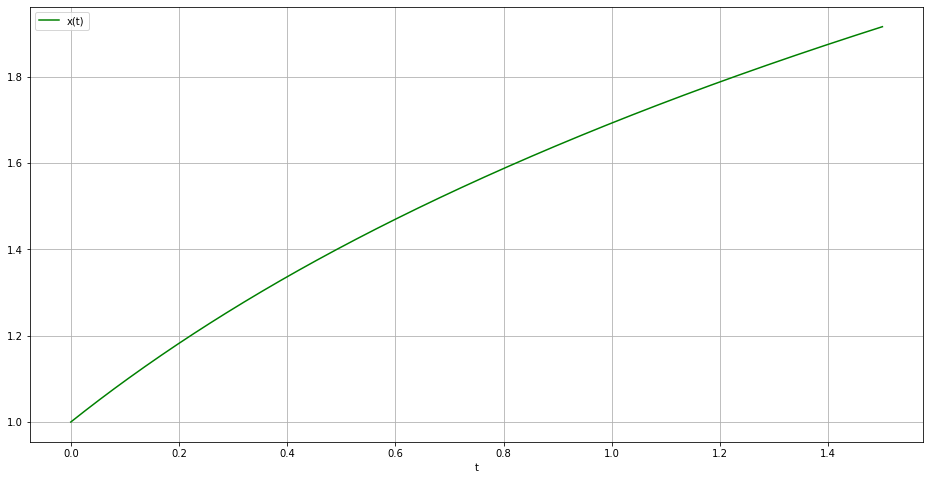

In [6]:
def simple_ode(t, x):
    return 1.0/(1.0+t) # = x dot

ode_solver(simple_ode, x0=1.0, tf=1.5)

Now we proceed to solve a system of differential equations. It works exactly the same as before, we define a function and give back the right hand side of the equations.

In this case, let us solve 

$x(t)' = y(t) - x(t)$ 

$y(t)' = t$

with $x(0) = 1.0$ and $y(0) = -1$.

Running the cell will give back the plot of the solutions. Also, you will see the value of $x(t_f)$ and $y(t_f)$. This is done to help you solve problem 8.1, so that you only need to change the equations to solve.

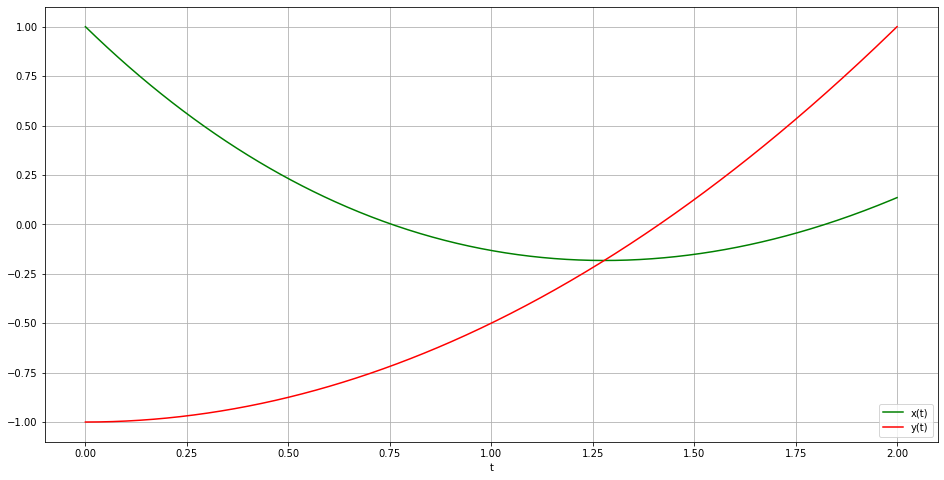

x(tf) = 0.13533619941659045
y(tf) = 0.9999999999999996


In [7]:
def simple_system_ode(t, x, y):
    return [(y-x), t] # = [x dot, y dot]

solution = ode_system_solver(simple_system_ode, x0=1.0, y0=-1.0, tf=2.0)
print(f"x(tf) = {solution[0,-1]}")
print(f"y(tf) = {solution[1,-1]}")

After getting used to solving first order differential equations, we can move on to solve second order differential equations, which we can think of also as the equations of motion.

In the first case, we are going to solve an harmonic oscillator including friction and a force term. The initial conditions are $x(0) = 10$ and $x'(0) \equiv v(0) = 0$. 

The left hand side plot shows $x(t)$ and $vx(t)$, as functions of time, while on the right hand side the plot shows the phase space diagram (where the red dot is the initial point, and the black dot is the position and velocity at $t_f$).

Please change the values around in the equation and see if you can obtain the different regimes of the oscillator.

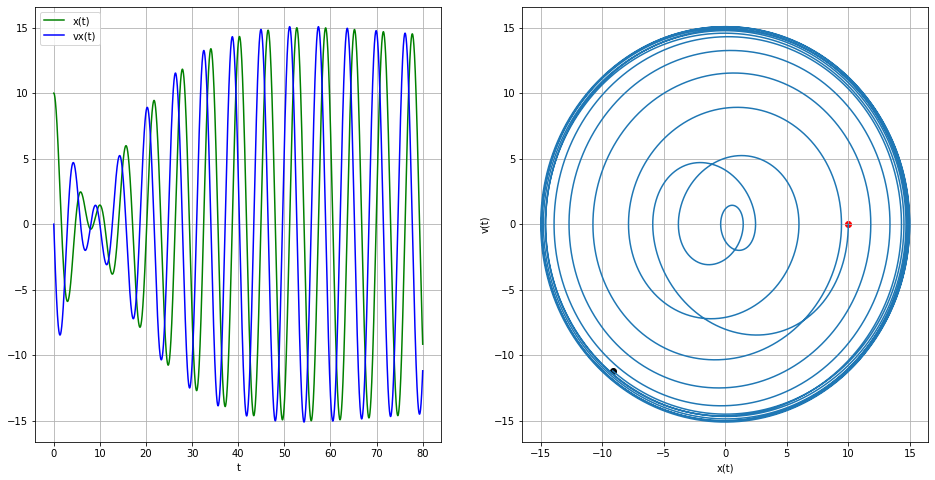

In [46]:
def harmonic_oscillator(t, x, vx):
    return 2.0*sin(t)-1.1*x-0.1*vx # = x dot dot 

eom_solver(harmonic_oscillator, x0=10.0, vx0=0.0, tf=80.0)

Finally, we also solve the equations of motion in two dimensions, $x(t)$ and $y(t)$.

The first example is a simple harmonic oscillator (but this time without any extra terms). Along with $x(t)$ vs $t$ and $y(t)$ vs $t$, we can also plot $x(t)$ vs $y(t)$ in order to prove the bonus exercise 6.3f: $x(t)$ and $y(t)$ is an ellipse for any value of the initial conditions.

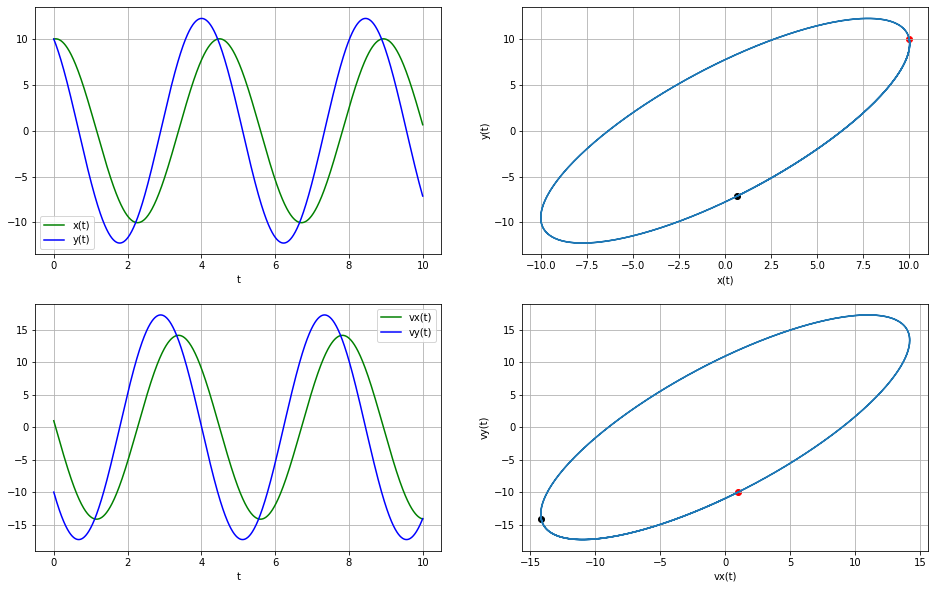

In [47]:
def harmonic_oscillator_2d(t, x, vx, y, vy):
    return [-2.0*x, -2.0*y] # = [x dot dot, y dot dot]

eom_solver_2d(harmonic_oscillator_2d, x0 = 10.0, vx0 = 1.0, y0 = 10.0, vy0 = -10.0, tf=10.0)

And as our last example, we solve the equations of motion of a planet orbiting around a star situated at the point $(0, 0)$. Depending on the initial conditions, you will see that the plot of $x(t)$ vs $y(t)$ is a close orbit (although if we let the time go for too long, it seems the solution collapses... could you explain why?) and sometimes it is a parabola.

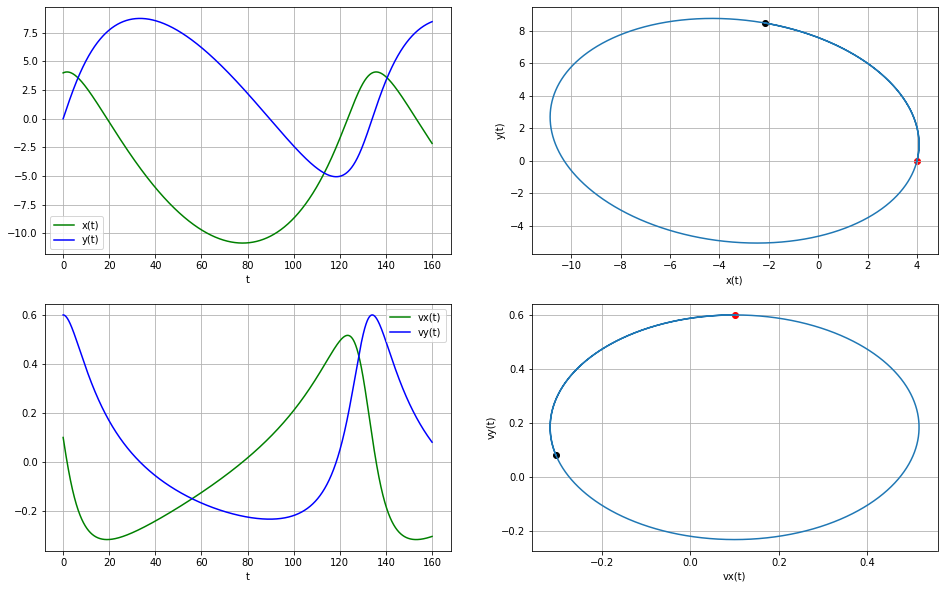

In [33]:
def gravity(t, x, vx, y, vy):
    r = sqrt(x**2+y**2)
    return [-x/r**3, -y/r**3]

eom_solver_2d(gravity, x0 = 4.0, vx0 = 0.1, y0 = 0.0, vy0 = 0.6, tf=160.0)